In [1]:
from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
# from lmfit.models import GaussianModel
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'

# Summary
This notebook shows a few examples of the automatic procedure to analyze a source. The process consists of three steps: plotting the light curve on three different scales; running periodograms on three different scales and in a couple ways; and the color-magnitude relationship. The former two parts include options to quickly adjust arguments based on initial output. The completely automatic version is still being optimized. For example, I try out different windows of detrending, but the ones I try aren't as based on the previous best period as I want them to be (in func autopd). Also, in autopd, I want to better present the phase-folded data with smaller periods (e.g. optimize window of detrending even when the best period is found without detrending).

> - Source 7 is a great example, so I also show how the auto-generate results can be expanded upon.
> - Source 3 has an interesting result where step 2 suggests (in the inset plot) a potentially sinusoidal variation in period with time.
    - with an ex. like that could notice and try different #of cuts/further investigate
**also, note this is just w/part 1 sources and not even including ones designated with a letter in addition to source number (i.e. 4a) in OIV
but adding those shouldn't be too difficult*

I think the auto functions are in a place where I wouldn't now run them on all the sources and use those figs, but I think they're good for guiding investigation. I think optimizing on a few sources will help make the automatic functions even more useful in terms of using the right ranges, windows, etc. for picking out trends

In [3]:
#load in table with file paths, coordinates, and orbital period for each source
cross = Table.read('sourcefiles.csv')

In [4]:
#dictionary to more easily go from source number to orbital period
orb_dict = dict(zip(np.array(cross['src_n']),np.array(cross['Porb']))) 
#example: gives orbital period in days for src 2
orb_dict[2]

84.0

# Source 2
- I band always pink; V band blue

orbital period: 84.0


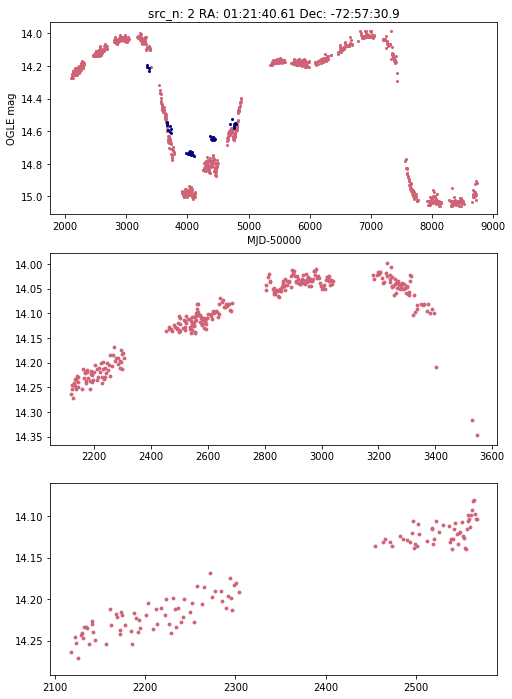

In [5]:
#load in lightcurves and plot three scales
reload(o)
iband2,vband2 = o.getIV(2,cross,plot=True,zooms=True,figsize=(8,12),mult=(3,8),offset=10,stack=True) #offset tricky; not always working

In [6]:
orb_dict[2]

84.0

- function below starts by looking for a large scale trend, then phase-folding and insetting the periodogram (top plot)
    - ctime boolean allows phase-fold to be colored by time, to look for steady evolution such as increasing phase shifts
- then looks for median ~hundreds day trend in two ways
    - without detrending
    - detrending with a few different windows
        - the mean result is used for phase-folding, although that detrending window isn't necessarily the window used in the fold (that's a to do)
        - the inset function is best period vs. window size to see how window of detrending affects the result
- lastly looks for orbital period/changes in orbital period
    - other options in how to do it but default as follows
        - breaks the LC into ten chunks (can be changed with numcuts) and runs periodogram on each (no detrending)
            - inset is best pd. vs. cut so it's also best pd vs. time
        - looks for trend without detrending
        - looks with detrending, once again showing best period vs. detrending window
- right now they all show phase-fold to get a sense of how good the best period is and if there are changes
- but can also look for trends by eye using function above, which shows LC on different scales

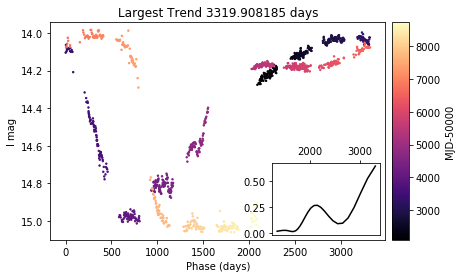

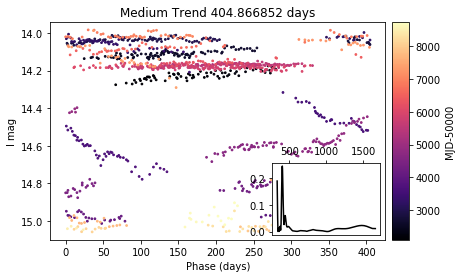

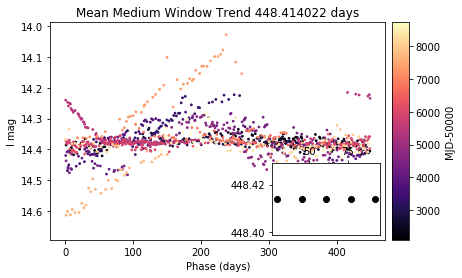

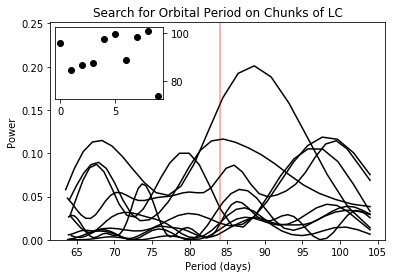

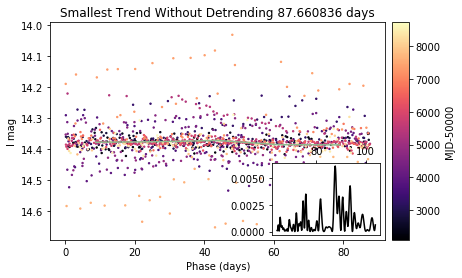

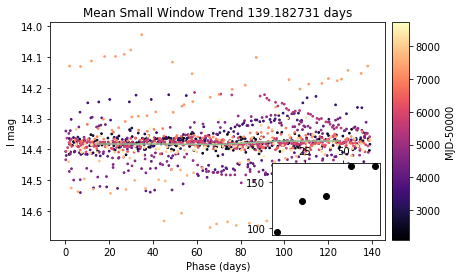

In [7]:
#automatic periodograms
reload(o)
o.autopd(iband2,orb_dict[2],plotpd=True,plotphase=True,printall=False,ctime=True,orb_bounds=(20,20),cutlc=True,numcuts=10,plotdet=True,pbins=5,saveall=False,srcnum=2)

- above: picks out that there's:
    - an inconsistent huge "trend"
    - something going on every ~400 days (see spikes in middle panel above)
    - picks out orbital period, approximately
- phase folding often doesn't look great, but that's reflective of the difficulty/that you should go in and confirm this periodicities
    - option to plot detrended etc. but window choices still not robust

I and V-I correlation: -0.9846799925699677
V and V-I correlation: -0.9546678612457401


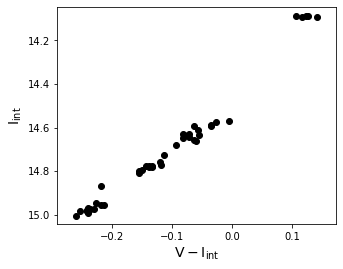

In [8]:
#V-I: positive correlation means redder when brighter
o.colormag(iband2,vband2)

# Source 3

orbital period: 18.38


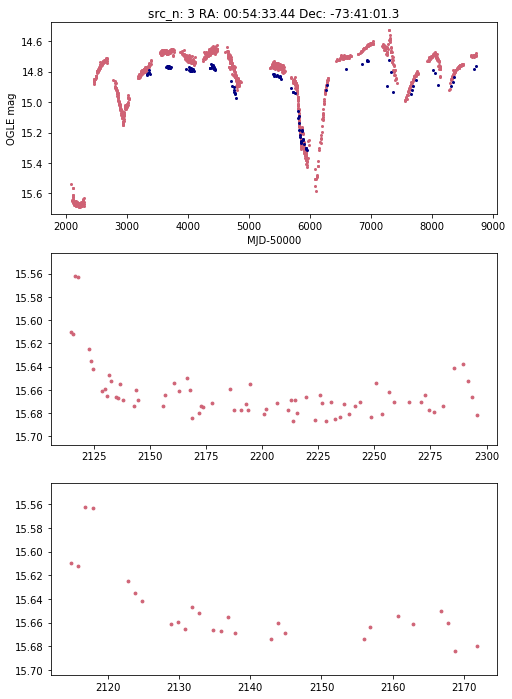

In [9]:
iband3,vband3 = o.getIV(3,cross,plot=True,zooms=True,figsize=(8,12),mult=(3,8),offset=10,stack=True) 

**notice in cell below: orbital period on chunks of LC looks periodic**

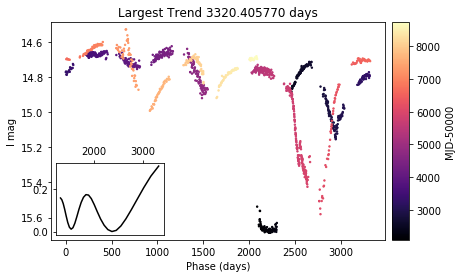

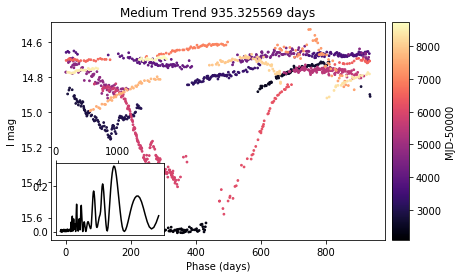

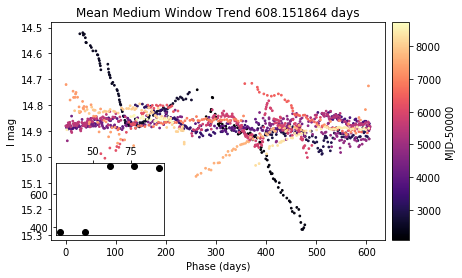

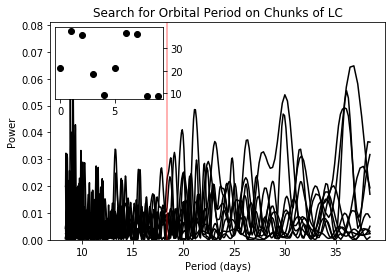

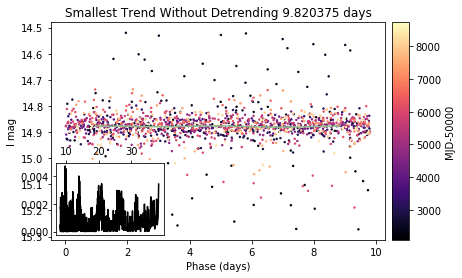

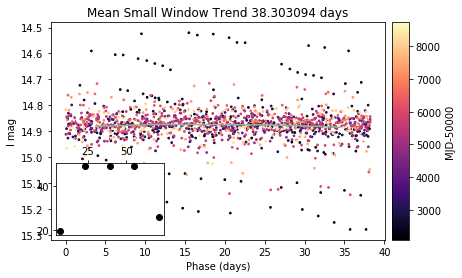

In [10]:
o.autopd(iband3,orb_dict[3],plotpd=True,plotphase=True,printall=False,ctime=True,orb_bounds=(10,20),cutlc=True,numcuts=10,plotdet=True,pbins=5,saveall=False,srcnum=3,inloc='lower left')

I and V-I correlation: -0.8002922261337712
V and V-I correlation: -0.6698593996852642


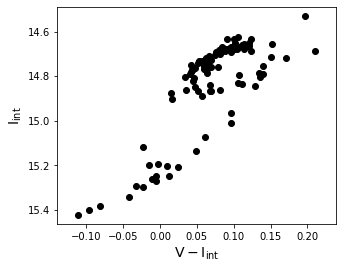

In [11]:
#color mag
o.colormag(iband3,vband3) #TO DO: show time as another variable

# Source 7
- with this one, showing some options for slightly more in-depth investigation after regular three cells

orbital period: 21.9


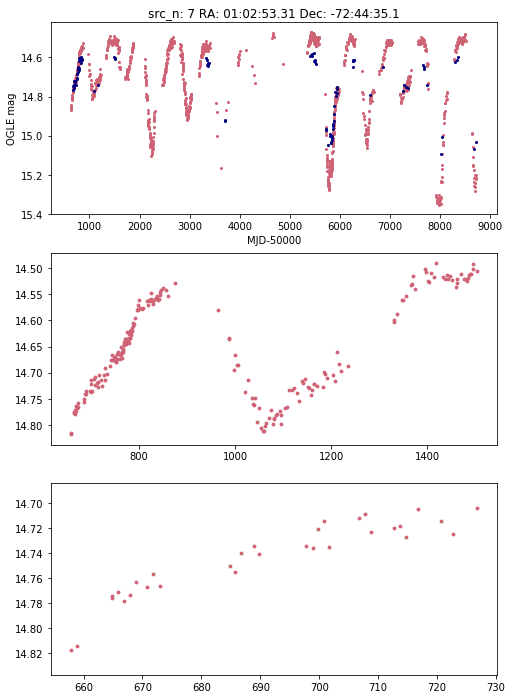

In [12]:
reload(o)
i7list,v7list = o.getIV(7,cross,both=True,plot=True,zooms=True,figsize=(8,12),mult=(3,20),offset=20,stack=False) #offset tricky; not always working

In [13]:
#used option in cell below to return separate tabs for OII,OIII,OIV so stacking here
iband7,vband7 = vstack(i7list),vstack(v7list)

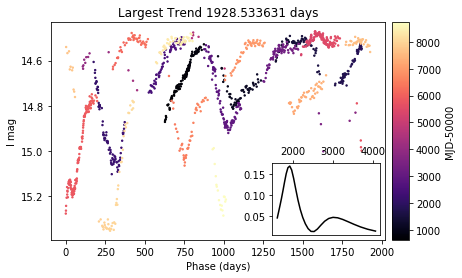

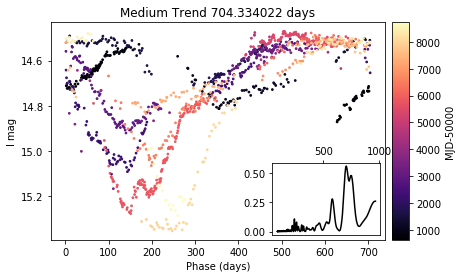

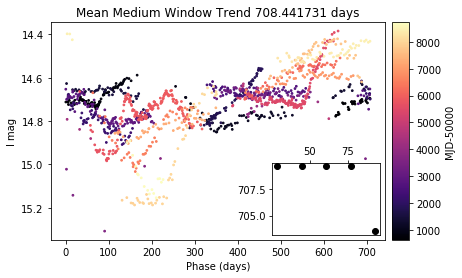

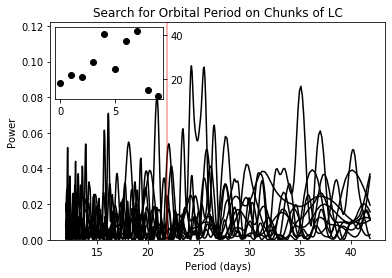

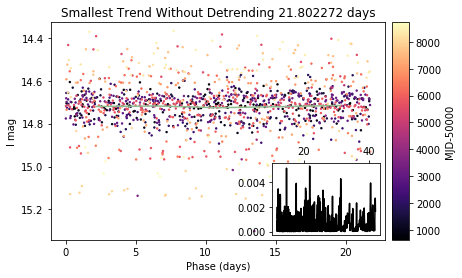

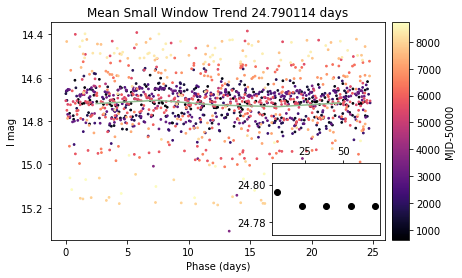

In [14]:
reload(o)
o.autopd(iband7,orb_dict[7],plotpd=True,plotphase=True,printall=False,ctime=True,orb_bounds=(10,20),cutlc=True,numcuts=10,plotdet=True,pbins=5,saveall=False,srcnum=7)

I and V-I correlation: -0.9670343623561133
V and V-I correlation: -0.9225217209125162


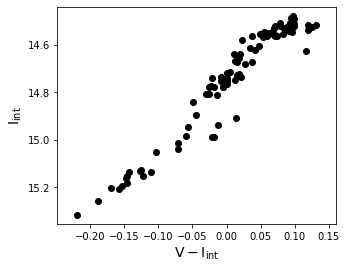

In [15]:
o.colormag(iband7,vband7)

## examples for src 7 of other functions that can be used for slightly more in-depth period analysis
> but still would of course do more than this, but just getting more of a feeling for possible periodicities, possible changes in periodcity

<Quantity 24.77120287>

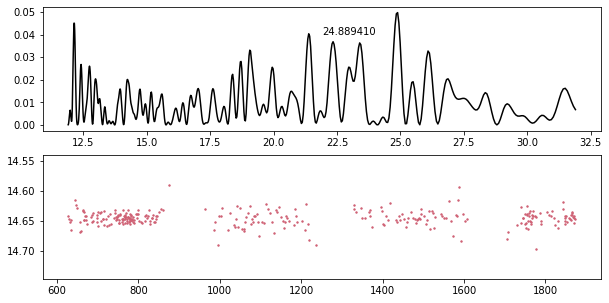

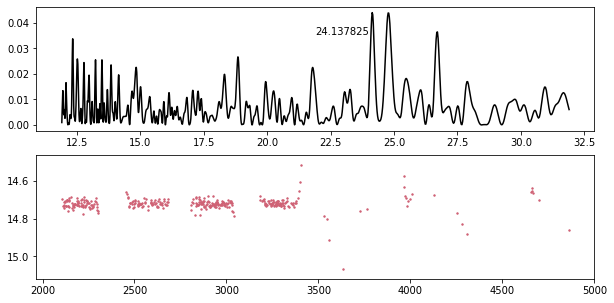

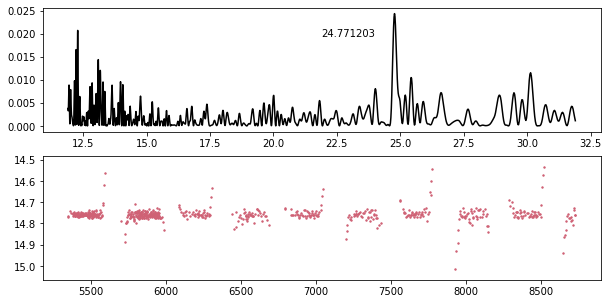

In [16]:
#example of pdgram on different og; beware of detrending window
o.knownorb(i7list[0],orb_dict[7],lower=10,upper=10,window=9,cutdata=False,cut1=0,cut2=500,plotdet=True,figsize=(10,5))
o.knownorb(i7list[1],orb_dict[7],lower=10,upper=10,window=9,cutdata=False,cut1=0,cut2=500,plotdet=True,figsize=(10,5))
o.knownorb(i7list[2],orb_dict[7],lower=10,upper=10,window=9,cutdata=False,cut1=0,cut2=500,plotdet=True,figsize=(10,5))

<Quantity 21.45951325>

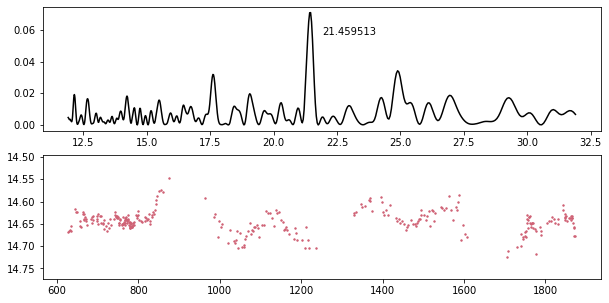

In [17]:
#same function can take smaller cut of data
#closer to known orbital period with this larger window of detrending
#some kind of ~200 day period?
o.knownorb(i7list[0],21.9,lower=10,upper=10,window=31,cutdata=True,cut1=0,cut2=500,plotdet=True,figsize=(10,5))

above: picks up orbital period (within half a day) on OII
- but also the detrended data has some sort of trend repeating every couple hundred days
- plotting original and two versions of detrended below

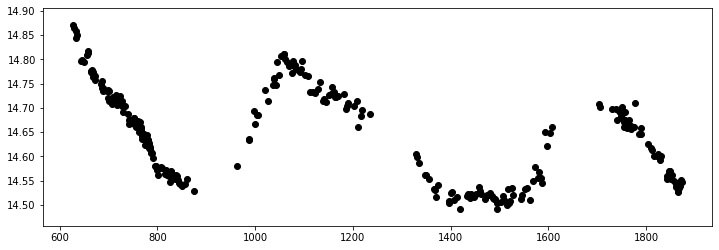

In [18]:
plt.figure(figsize=(12,4))
plt.scatter(i7list[0]['MJD-50000'],i7list[0]['I mag'],color='black')

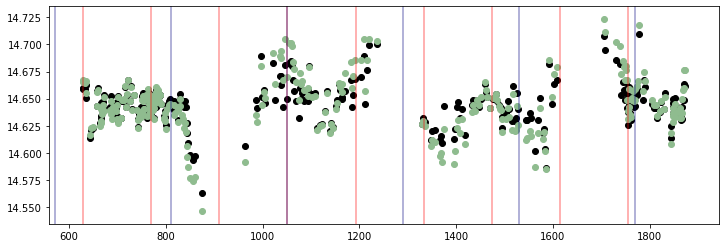

In [19]:
#periodicity found after detrending --> would have to confirm w/out
#also putting in 240 day (see below for each)
plt.figure(figsize=(12,4))
o.detrend(i7list[0],window=21)
plt.scatter(i7list[0]['MJD-50000'],i7list[0]['I detrend'],color='black')
o.detrend(i7list[0],window=31)
plt.scatter(i7list[0]['MJD-50000'],i7list[0]['I detrend'],color='darkseagreen')
for i in range(9):
    plt.axvline(i7list[0]['MJD-50000'][0]+i*141,color='red',alpha=0.4)
for i in range(-2,4):
    plt.axvline(1050+i*240,color='navy',alpha=0.4)  

<Quantity 140.72226039>

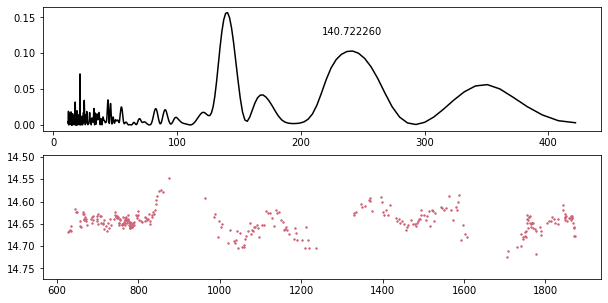

In [20]:
#larger trend
o.knownorb(i7list[0],21.9,lower=10,upper=400,window=31,cutdata=True,cut1=0,cut2=500,plotdet=True,figsize=(10,5))

<Quantity 240.71134569>

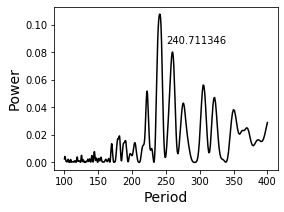

In [21]:
#looking for ~140 day trend without detrending --> get that other peak again around 240 days
#all of this would require more attention since multiple periodicities
o.periodogram(iband7,det=False,more=False,minp=100,maxp=400)

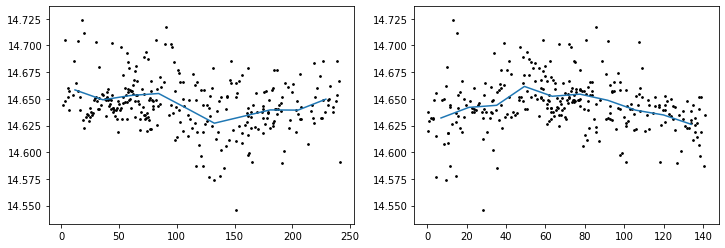

In [22]:
#phase fold with 140 and 240 days on detrended data
fig,(ax,ax1) = plt.subplots(1,2,figsize=(12,4))
ax.scatter(i7list[0]['MJD-50000']%241,i7list[0]['I detrend'],color='black',s=3)
ax1.scatter(i7list[0]['MJD-50000']%141,i7list[0]['I detrend'],color='black',s=3)

# for i in range(-2,4):
#     plt.axvline(1050+i*240,color='navy',alpha=0.4)  
#check if mean phase is working
reload(o)
mid,avgs = o.meanphase(i7list[0],141,pbins=10,det=True)
ax1.plot(mid,avgs)
mid,avgs = o.meanphase(i7list[0],241,pbins=10,det=True)
ax.plot(mid,avgs)

In [25]:
141/5

28.2

<Quantity 702.8086024>

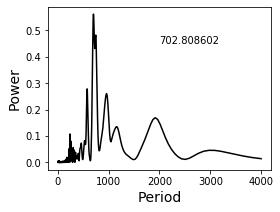

In [26]:
#large-scale; no detrending; full range of possible periods
# o.periodogram(iband7,det=False,more=False,minp=100,maxp=2000)
o.periodogram(iband7,det=False,more=False,minp=10,maxp=4000)

<Quantity 727.80762778>

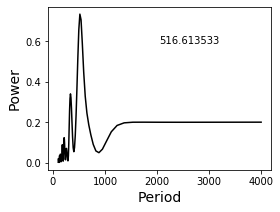

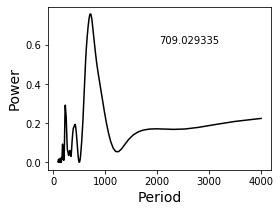

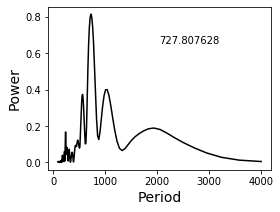

In [27]:
o.periodogram(i7list[0],det=False,more=False,minp=100,maxp=4000)
o.periodogram(i7list[1],det=False,more=False,minp=100,maxp=4000)
o.periodogram(i7list[2],det=False,more=False,minp=100,maxp=4000)

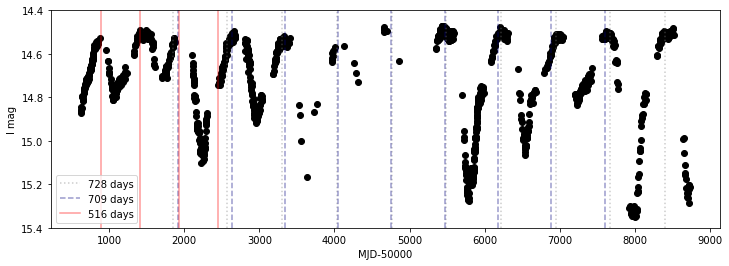

In [28]:
#spacing from periodogram results above
plt.figure(figsize=(12,4))
plt.scatter(iband7['MJD-50000'],iband7['I mag'],color='black')
for i in range(1,10):
    plt.axvline(8400-i*728,color='grey',alpha=0.4,linestyle='dotted')
plt.axvline(8400,color='grey',alpha=0.4,linestyle='dotted',label='728 days')

for i in range(-4,4):
    plt.axvline(4050-i*709,color='navy',alpha=0.4,linestyle='dashed')
plt.axvline(4050+5*709,color='navy',alpha=0.4,linestyle='dashed',label='709 days')
    
for i in range(1,4):
    plt.axvline(900+i*516,color='red',alpha=0.4)
plt.axvline(900,color='red',alpha=0.4,label='516 days')

plt.ylim(15.4,14.4)
plt.ylabel('I mag')
plt.xlabel('MJD-50000')
plt.legend()

# above: approximate
- best fits from OII, OIII, OIV, but extended a bit to show failure
- by-eye looks like you could try a line to the troughs of the flares; correlated?

- can also see the phase shifts over time in the medium trend